# USA.Gov Data From Bitly
This is an analysis that explores the partnership between the US government and Bitly. The contract provided a feed of anonymous data collected from users who shorted website links ending with .gov or .mil. Hourly snapshots were provided on the dynamic information as well as downloadable text files. Unfortunately, the project is no longer active between the two entities. If there are any questions or concerns the author may be contacted to discuss analysis and methodology.

In [220]:
# Import any dependencies 
import os, os.path, json
import numpy as np 

In [222]:
# Path for the data
path = 'example.txt'

In [224]:
# Preview the data 
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [226]:
# Utilize the json module and loads function to convert the JSON file into a 
# python dictionary object
records = [json.loads(line) for line in open(path)]

In [228]:
# Preview the data as a list of python dictionaries 
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [230]:
# Continue endevour of comparing counting timezones in pure python. First find
# the most common timezones in the dataset.
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [232]:
# Preview the data 
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [234]:
# Continue manipulating the data by filtering out empty strings. We will begin 
# the analysis by counting sequences. This is by far the hard way, proper 
# methodology would have been doing this through pandas. This uses only 
# Python's standard libraries. We start by creating a dictionary to store the 
# count as we iterate though the sequence.
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [236]:
counts = get_counts(time_zones)

In [238]:
# Preview the data 
counts['America/New_York']

1251

In [240]:
len(time_zones)

3440

In [242]:
# Find the most popular timezones and their usage frequency. We will create a 
# list of tuples where each tuple holds (count, tz). We then sort the list of
# tuples based on the first element (count). I return the last n items from 
# the sorted list (highest counts)
def top_counts(count_dict, n=10): 
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [244]:
# Preview Data
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [246]:
# Conversely an easier way to perform the same action is to use the 
# collections.Counter class
from collections import Counter 

In [248]:
counts = Counter(time_zones)

In [250]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [252]:
# Continue now to display the same application but using pandas begin by 
# importing any dependencies
import pandas as pd

In [254]:
# Define the dataframe 
frame = pd.DataFrame(records)

In [256]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [258]:
# Preview the data 
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [260]:
# Preview the data for better understanding of the data using value_counts 
# method for Series 
tz_counts = frame['tz'].value_counts()

In [262]:
tz_counts[:10]

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

In [264]:
# Visualize the data with matplotlib take care of any unknown and missing 
# timezone data.
clean_tz = frame['tz'].fillna('Missing')

In [266]:
clean_tz[clean_tz == ''] = 'Unknown'

In [268]:
# Preview data
tz_counts = clean_tz.value_counts()

In [270]:
tz_counts[:10]

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: count, dtype: int64

In [272]:
# Utilize the Seaborn package for visualization via a horizontal bar plot. 
import seaborn as sns

In [274]:
subset = tz_counts[:10]

<Axes: ylabel='tz'>

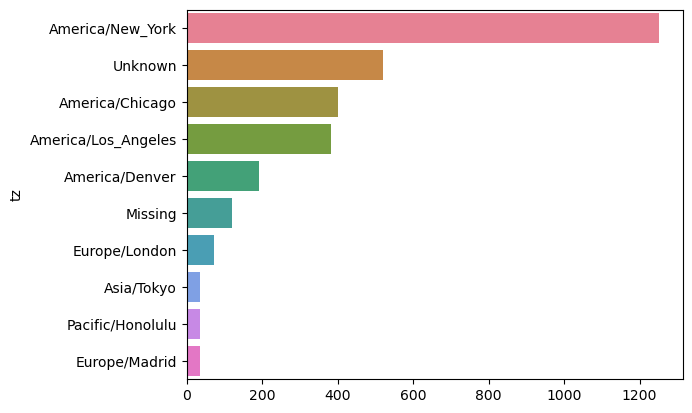

In [276]:
sns.barplot(y=subset.index, x=subset.values, palette='husl', hue=subset.index)

In [278]:
# Preview the data find the field that contains information about the browswer, 
# device, or application used for URL shortening.
frame['a'][1]

'GoogleMaps/RochesterNY'

In [280]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [282]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [284]:
# Parse the information we need from the agent strings by splitting off the 
# first token that shows browser compatibility and creating a new summary of 
# the user behavior.
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [286]:
# Preview the data
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [288]:
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
Name: count, dtype: int64

In [290]:
# Seperate the timezones based on Windows and non Windows users, exclude data 
# that is missing.
cframe = frame[frame.a.notnull()]

In [294]:
cframe.loc[:, 'os'] = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [303]:
# Preview the data 
cframe['os'][:10]

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
5        Windows
6        Windows
7        Windows
8    Not Windows
9        Windows
Name: os, dtype: object

In [305]:
# Group the data by its timezone column and the new list of operating systems in the cframe. 
by_tz_os = cframe.groupby(['tz', 'os'])

In [307]:
# Gather the group counts via the .size() function and unstack the data. 
agg_counts = by_tz_os.size().unstack().fillna(0)

In [309]:
# Preview the data
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [311]:
# Gather the top timezones in the dataset by creating an indirect index array 
# from the row counts. Begin by sorting in ascending order. 
indexer = agg_counts.sum(1).argsort()

In [313]:
# Preview the data 
indexer[:10]

tz
                                   8
Africa/Cairo                       9
Africa/Casablanca                 11
Africa/Ceuta                      14
Africa/Johannesburg               87
Africa/Lusaka                     86
America/Anchorage                 21
America/Argentina/Buenos_Aires    20
America/Argentina/Cordoba         56
America/Argentina/Mendoza         57
dtype: int64

In [330]:
# Use the panda's nlargest.() function to select those row and slice off the 
# last 10 rows of data.
top_10_tz = agg_counts.sum(1).nlargest(10).index

In [332]:
count_subset = agg_counts.loc[top_10_tz]

In [334]:
count_subset_stacked = count_subset.stack()

In [336]:
# Preview the data
count_subset

os,Not Windows,Windows
tz,,
America/New_York,339.0,912.0
,245.0,276.0
America/Chicago,115.0,285.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Europe/London,43.0,31.0
Asia/Tokyo,2.0,35.0
Pacific/Honolulu,0.0,36.0
Europe/Madrid,16.0,19.0


In [338]:
# Visualize the data with a stacked bar plot, but first rearrange the data. 
count_subset = count_subset.stack()

In [340]:
count_subset.name = 'total'

In [342]:
count_subset = count_subset.reset_index()

In [350]:
# Preview the data 
count_subset[:15]

,tz,os,total
0,America/New_York,Not Windows,339.0
1,America/New_York,Windows,912.0
2,,Not Windows,245.0
3,,Windows,276.0
4,America/Chicago,Not Windows,115.0
5,America/Chicago,Windows,285.0
6,America/Los_Angeles,Not Windows,130.0
7,America/Los_Angeles,Windows,252.0
8,America/Denver,Not Windows,132.0
9,America/Denver,Windows,59.0


<Axes: xlabel='total', ylabel='tz'>

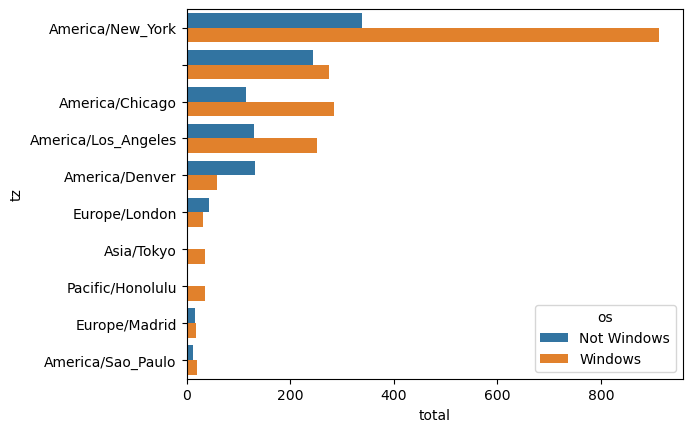

In [352]:
# Normalize the data as necessary to optimize graph. 
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [360]:
def norm_total(group):
    group['normed_total'] = count_subset.groupby('tz')
    return group 
results = count_subset.total / group.total.transform('sum')

<Axes: xlabel='normed_total', ylabel='tz'>

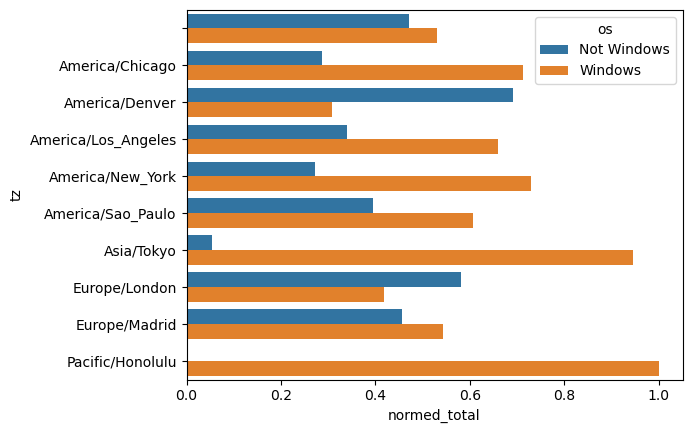

In [362]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)